# Book of Maps

Just Random Templates, mostly to standardize formats for the re-emergence paper, but for future reference and consistency as well...

In [7]:
# Setup

import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.patheffects as pe

import sys
import os

import tqdm
import time


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [11]:
# Custom Modules

machine = "Astraeus"

# First Load the Parameter File
cwd = os.getcwd()
sys.path.append(cwd+ "/..")

# First Load the Parameter File
cwd = os.getcwd()
sys.path.append(cwd+ "/..")
import reemergence_params as rparams

# Paths and Load Modules
pathdict = rparams.machine_paths[machine]

sys.path.append(pathdict['amvpath'])
sys.path.append(pathdict['scmpath'])

# Import AMV Calculation
from amv import proc,viz
import amv.loaders as dl

# Import stochastic model scripts
import scm


In [12]:
# Other Plotting Parameters

bboxplot                    = [-80,0,20,65]
mpl.rcParams['font.family'] = 'Avenir'
mons3                       = proc.get_monstr(nletters=3)
fsz_tick                    = 18
fsz_axis                    = 22
fsz_title                   = 28

proj                        = ccrs.PlateCarree()

In [13]:
# Load some dummy variables

ds_uvel,ds_vvel = dl.load_current(mldavg=True)
ds_bsf          = dl.load_bsf(ensavg=False)
ds_ssh          = dl.load_bsf(ensavg=False,ssh=True)

# Convert Currents to m/sec instead of cmsec
ds_uvel         = ds_uvel/100
ds_vvel         = ds_vvel/100

# Load data processed by [calc_monmean_CESM1.py]
ds_sss          = dl.load_monmean('SSS')
ds_sst          = dl.load_monmean('SST')


tlon            = ds_uvel.TLONG.mean('ens').values
tlat            = ds_uvel.TLAT.mean('ens').values

# # Load Mixed-Layer Depth
# mldpath = input_path + "mld/"
# mldnc   = "CESM1_HTR_FULL_HMXL_NAtl_EnsAvg.nc"
# ds_mld  = xr.open_dataset(mldpath+mldnc).h.load()

# Load Land Ice Mask
icemask     = xr.open_dataset(input_path + "masks/CESM1LE_HTR_limask_pacificmask_enssum_lon-90to20_lat0to90.nc")

mask        = icemask.MASK.squeeze()
mask_plot   = xr.where(np.isnan(mask),0,mask)#mask.copy()


mask_reg_sub    = proc.sel_region_xr(mask,bboxplot)
mask_reg_ori    = xr.ones_like(mask) * 0
mask_reg        = mask_reg_ori + mask_reg_sub


mask_apply  = icemask.MASK.squeeze().values

# Load Gulf Stream
ds_gs   = dl.load_gs()
ds_gs   = ds_gs.sel(lon=slice(-90,-50))
ds_gs2  = dl.load_gs(load_u2=True)

NameError: name 'input_path' is not defined

## 1 Panel North Atlantic Map

Copied from viz_CESM1_HTR_meanstates.py on 2024.09.26

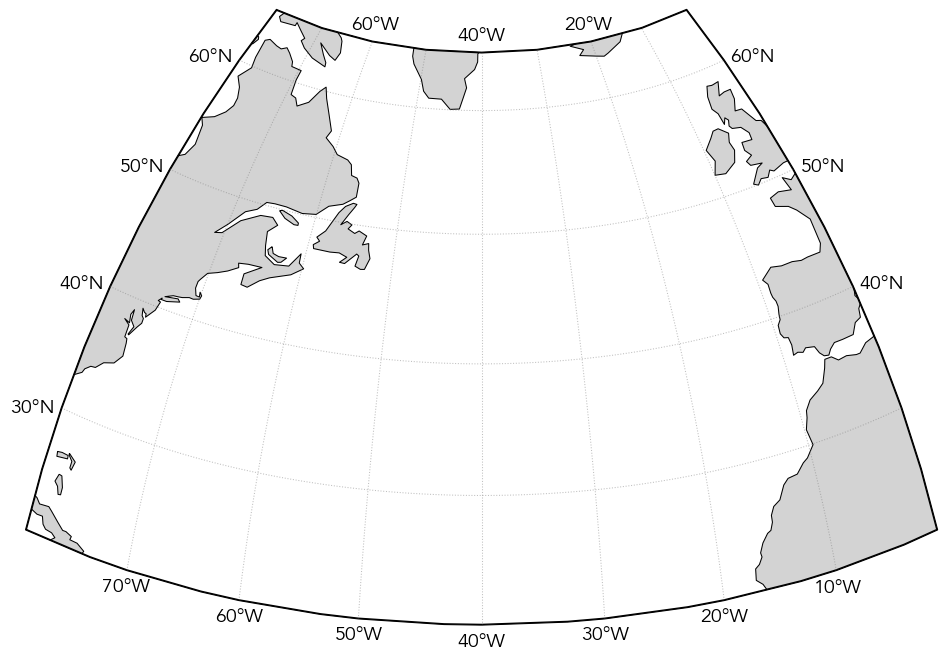

In [14]:
# Single Map (Orthomap)

# Font Sizes
fsz_tick  = 14
fsz_axis  = 22
fsz_title = 28

qint       = 2
plot_point = True
pmesh      = False



cints_sssmean = np.arange(34,37.6,0.2)

regplot = [0,1,3]
nregs   = len(regplot)

# Initialize Plot and Map
fig,ax,_    = viz.init_orthomap(1,1,bboxplot,figsize=(24,6.5))
ax          = viz.add_coast_grid(ax,bbox=bboxplot,fill_color="lightgray",fontsize=fsz_tick)


# # Plot Currents
# plotu = ds_uvel.UVEL.mean('ens').mean('month').values
# plotv = ds_vvel.VVEL.mean('ens').mean('month').values
# ax.quiver(tlon[::qint,::qint],tlat[::qint,::qint],plotu[::qint,::qint],plotv[::qint,::qint],
#           color='darkslateblue',transform=proj,alpha=0.75)

# # Plot Mean SST (Colors)
# plotvar = ds_sst.SST.mean('ens').mean('mon').transpose('lat','lon') #* mask_apply
# if pmesh:
#     pcm     = ax.pcolormesh(plotvar.lon,plotvar.lat,plotvar,transform=proj,zorder=-1,
#                 linewidths=1.5,cmap="RdYlBu_r",vmin=280,vmax=300)
# else:
#     cints_sstmean = np.arange(280,301,1)
#     pcm     = ax.contourf(plotvar.lon,plotvar.lat,plotvar,transform=proj,zorder=-1,
#                 cmap="RdYlBu_r",levels=cints_sstmean)
# cb = viz.hcbar(pcm,ax=ax,fraction=0.045)
# cb.set_label("SST ($\degree C$)",fontsize=fsz_axis)
# cb.ax.tick_params(labelsize=fsz_tick)

# # Plot Mean SSS (Contours)
# plotvar = ds_sss.SSS.mean('ens').mean('mon').transpose('lat','lon') #* mask_reg
# cl = ax.contour(plotvar.lon,plotvar.lat,plotvar,transform=proj,
#             linewidths=1.5,colors="darkviolet",levels=cints_sssmean,linestyles='dashed')
# ax.clabel(cl,fontsize=fsz_tick)

# # Plot Gulf Stream Positionfig,axs,_       = viz.init_orthomap(1,2,bboxplot,figsize=(20,10))
# ax.plot(ds_gs2.lon.mean('mon'),ds_gs2.lat.mean('mon'),transform=proj,lw=1.75,c='k',ls='dashdot')

# # Plot Ice Edge
# ax.contour(icemask.lon,icemask.lat,mask_plot,colors="cyan",linewidths=2.5,
#            transform=proj,levels=[0,1],zorder=-1)



# figname = "%sCESM1_Locator_MeanState.png" % (figpath,)
# plt.savefig(figname,dpi=200,bbox_inches='tight')

## 2 Panel North Atlantic Map, with shared colorbar


Copied from viz_pointwise_metris (the Stochastic Model vs CESM1 Cross Correlation Plots)

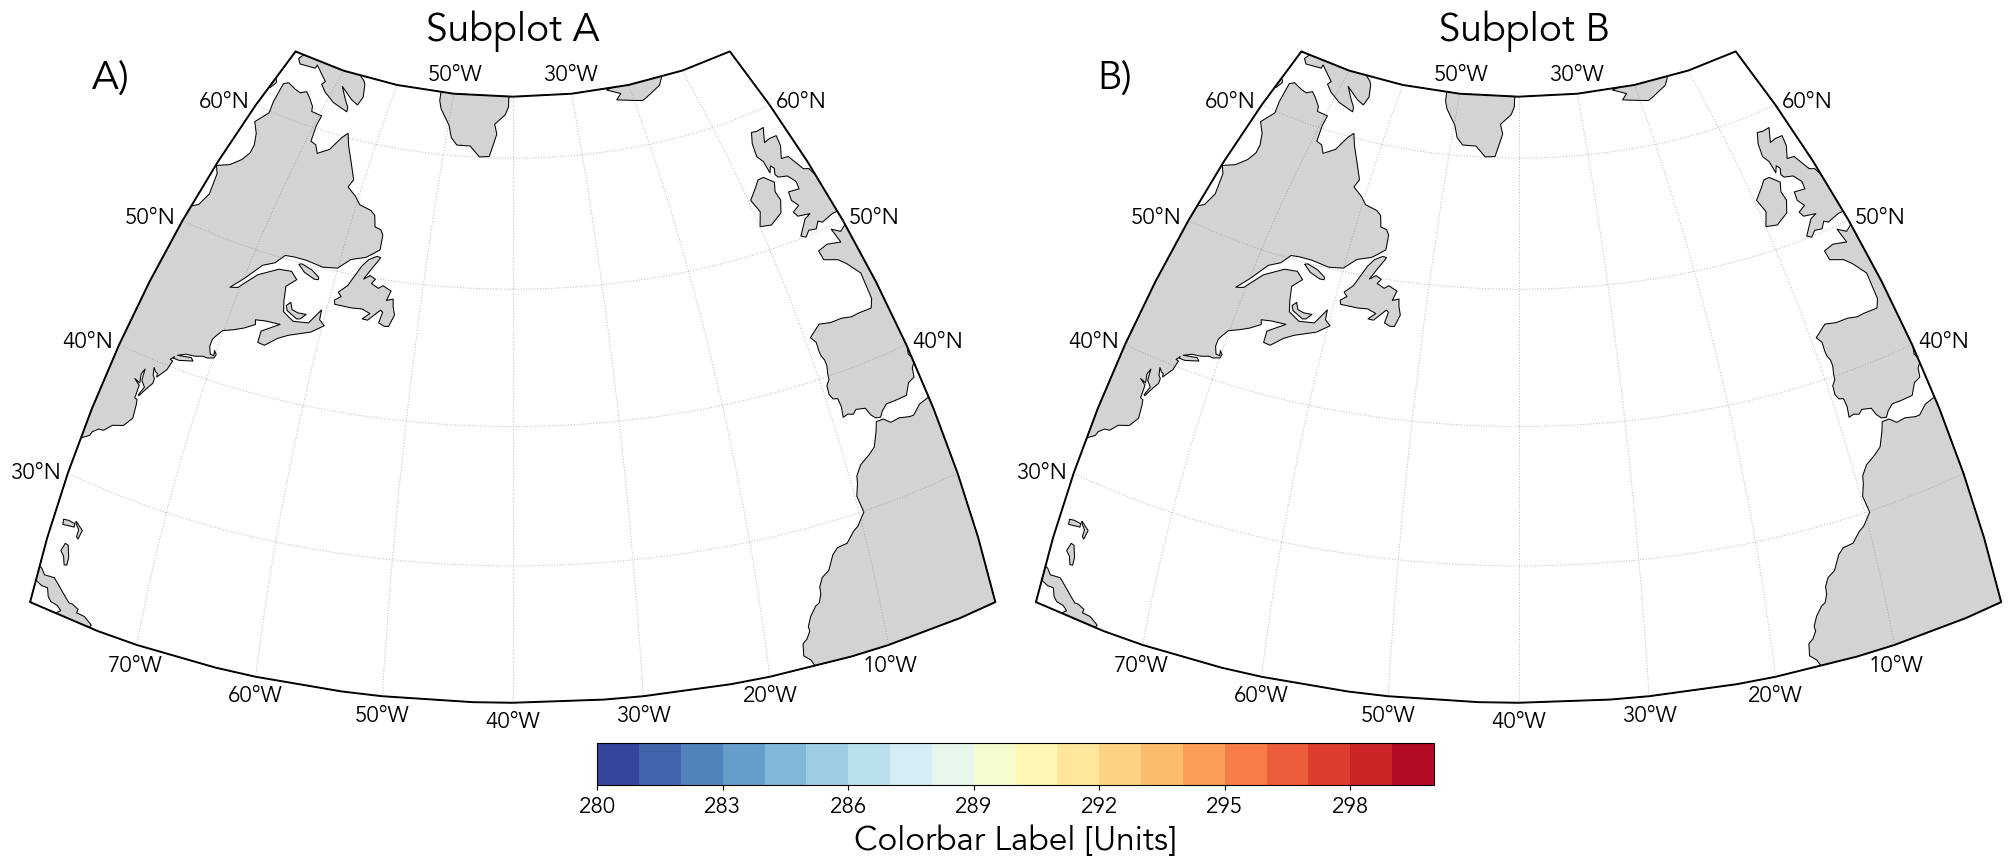

In [26]:

fsz_axis        = 24
fsz_title       = 28
fsz_tick        = 16

titles = ["Subplot A"," Subplot B"]
cb_lab = "Colorbar Label [Units]"


fig,axs,_ = viz.init_orthomap(1,2,bboxplot,figsize=(20,10))

ii = 0
for vv in range(2):
    
    ax      = axs[vv]
    ax      = viz.add_coast_grid(ax,bbox=bboxplot,fill_color="lightgray",fontsize=fsz_tick)
    
    ax.set_title(titles[vv],fontsize=fsz_title)
    
    viz.label_sp(ii,alpha=0.75,ax=ax,fontsize=fsz_title,x=0.05)
    ii += 1

cb = viz.hcbar(pcm,ax=axs.flatten(),fraction=0.05,pad=0.01)
cb.ax.tick_params(labelsize=fsz_tick)
cb.set_label(cb_lab,fontsize=fsz_axis)


## 4 Panel North Atlantic Plot

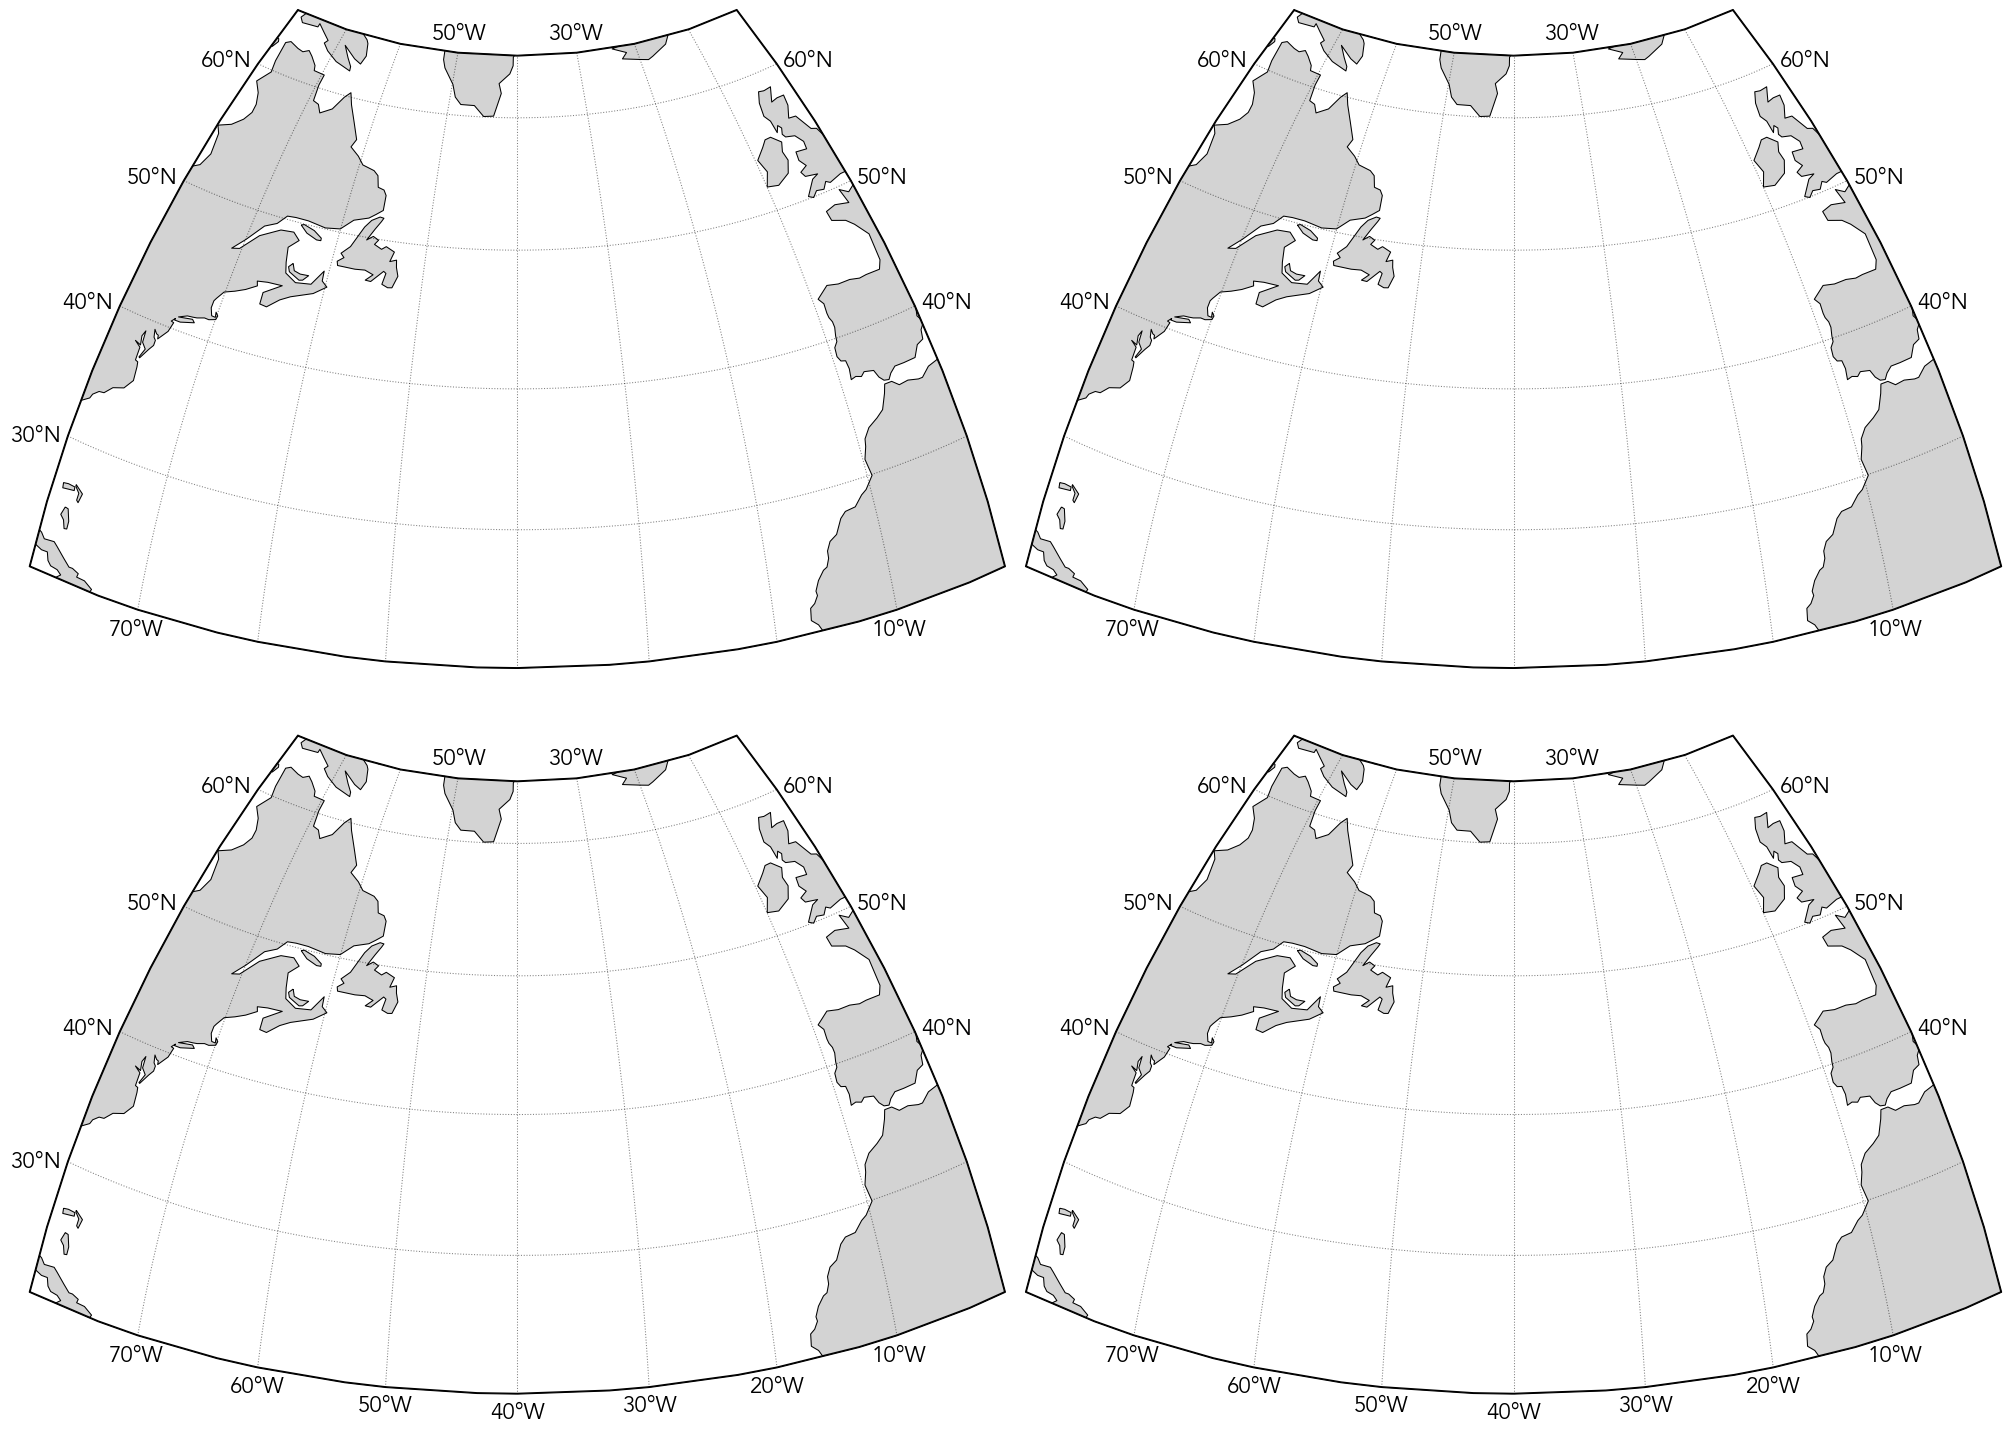

In [30]:
fig,axs,_   = viz.init_orthomap(2,2,bboxplot,figsize=(20,14.5))
ii          = 0


for vv in range(2):
    for yy in range(2): # Loop for experinent
        
        # Select Axis
        ax  = axs[vv,yy]
        
        # Set Labels
        blb = viz.init_blabels()
        if yy !=0:
            blb['left']=False
        else:
            blb['left']=True
            #viz.add_ylabel(vnames[vv],ax=ax,rotation='horizontal',fontsize=fsz_title)
        if vv == 1:
            blb['lower'] =True
        
        #ax.set_title("%s\n$\sigma^2$=%.5f $%s^2$"% (plotnames[ii],plotstds[ii],vunit),fontsize=fsz_title)
        ax           = viz.add_coast_grid(ax,bboxplot,fill_color="lightgray",fontsize=fsz_tick,blabels=blb,
                                        fix_lon=np.arange(-80,10,10),fix_lat=np.arange(0,70,10),grid_color="k")
        

# Seasonal Plot (4 Panel Row)


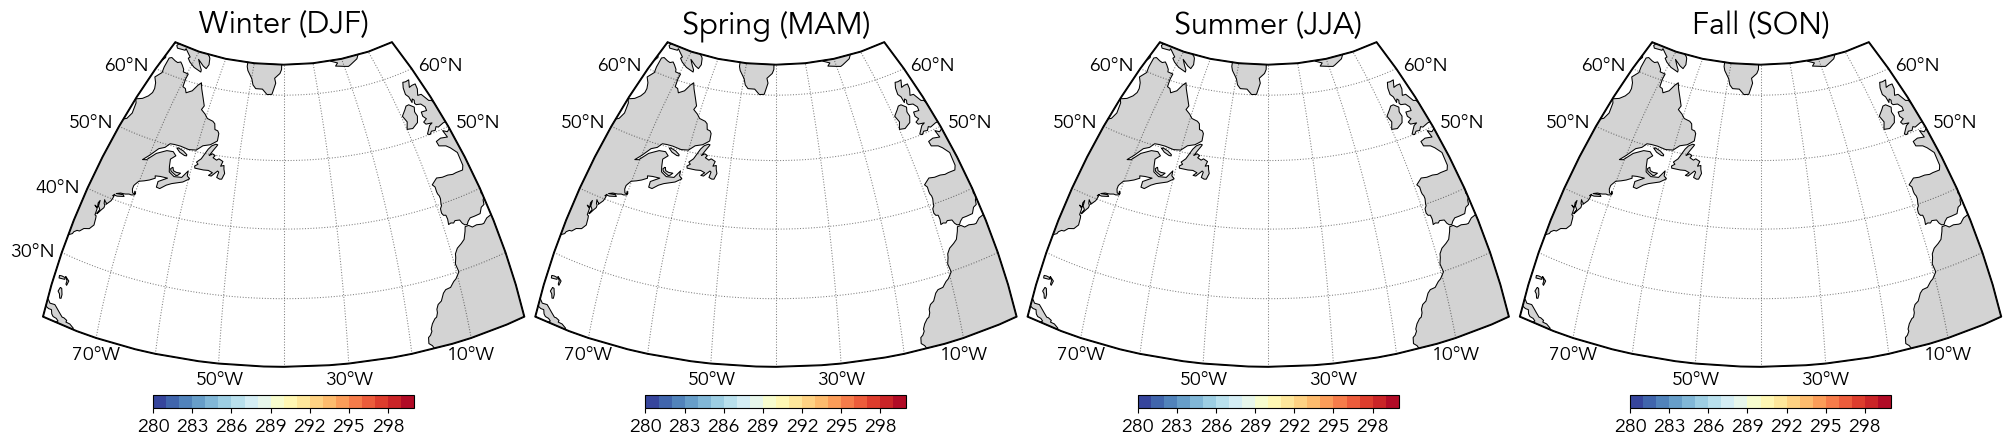

In [46]:
fig,axs,_   = viz.init_orthomap(1,4,bboxplot,figsize=(20,6))
ii          = 0

fsz_title   = 22
fsz_tick    = 14

seasons = ["Winter (DJF)","Spring (MAM)","Summer (JJA)","Fall (SON)"]

for ss in range(4):
    

    ax  = axs[ss]

    # Set Labels
    blb          = viz.init_blabels()
    blb['lower'] = True
    if ss !=0:
        blb['left']=False
    else:
        blb['left']=True
        #viz.add_ylabel(vnames[vv],ax=ax,rotation='horizontal',fontsize=fsz_title)

    ax.set_title(seasons[ss],fontsize=fsz_title)
    ax           = viz.add_coast_grid(ax,bboxplot,fill_color="lightgray",fontsize=fsz_tick,blabels=blb,
                                    fix_lon=np.arange(-80,10,10),fix_lat=np.arange(0,70,10),grid_color="k")
    
    cb = viz.hcbar(pcm,ax=ax,fraction=0.025,pad=0.01)
    cb.ax.tick_params(labelsize=fsz_tick)

# 25 Panel Plot...

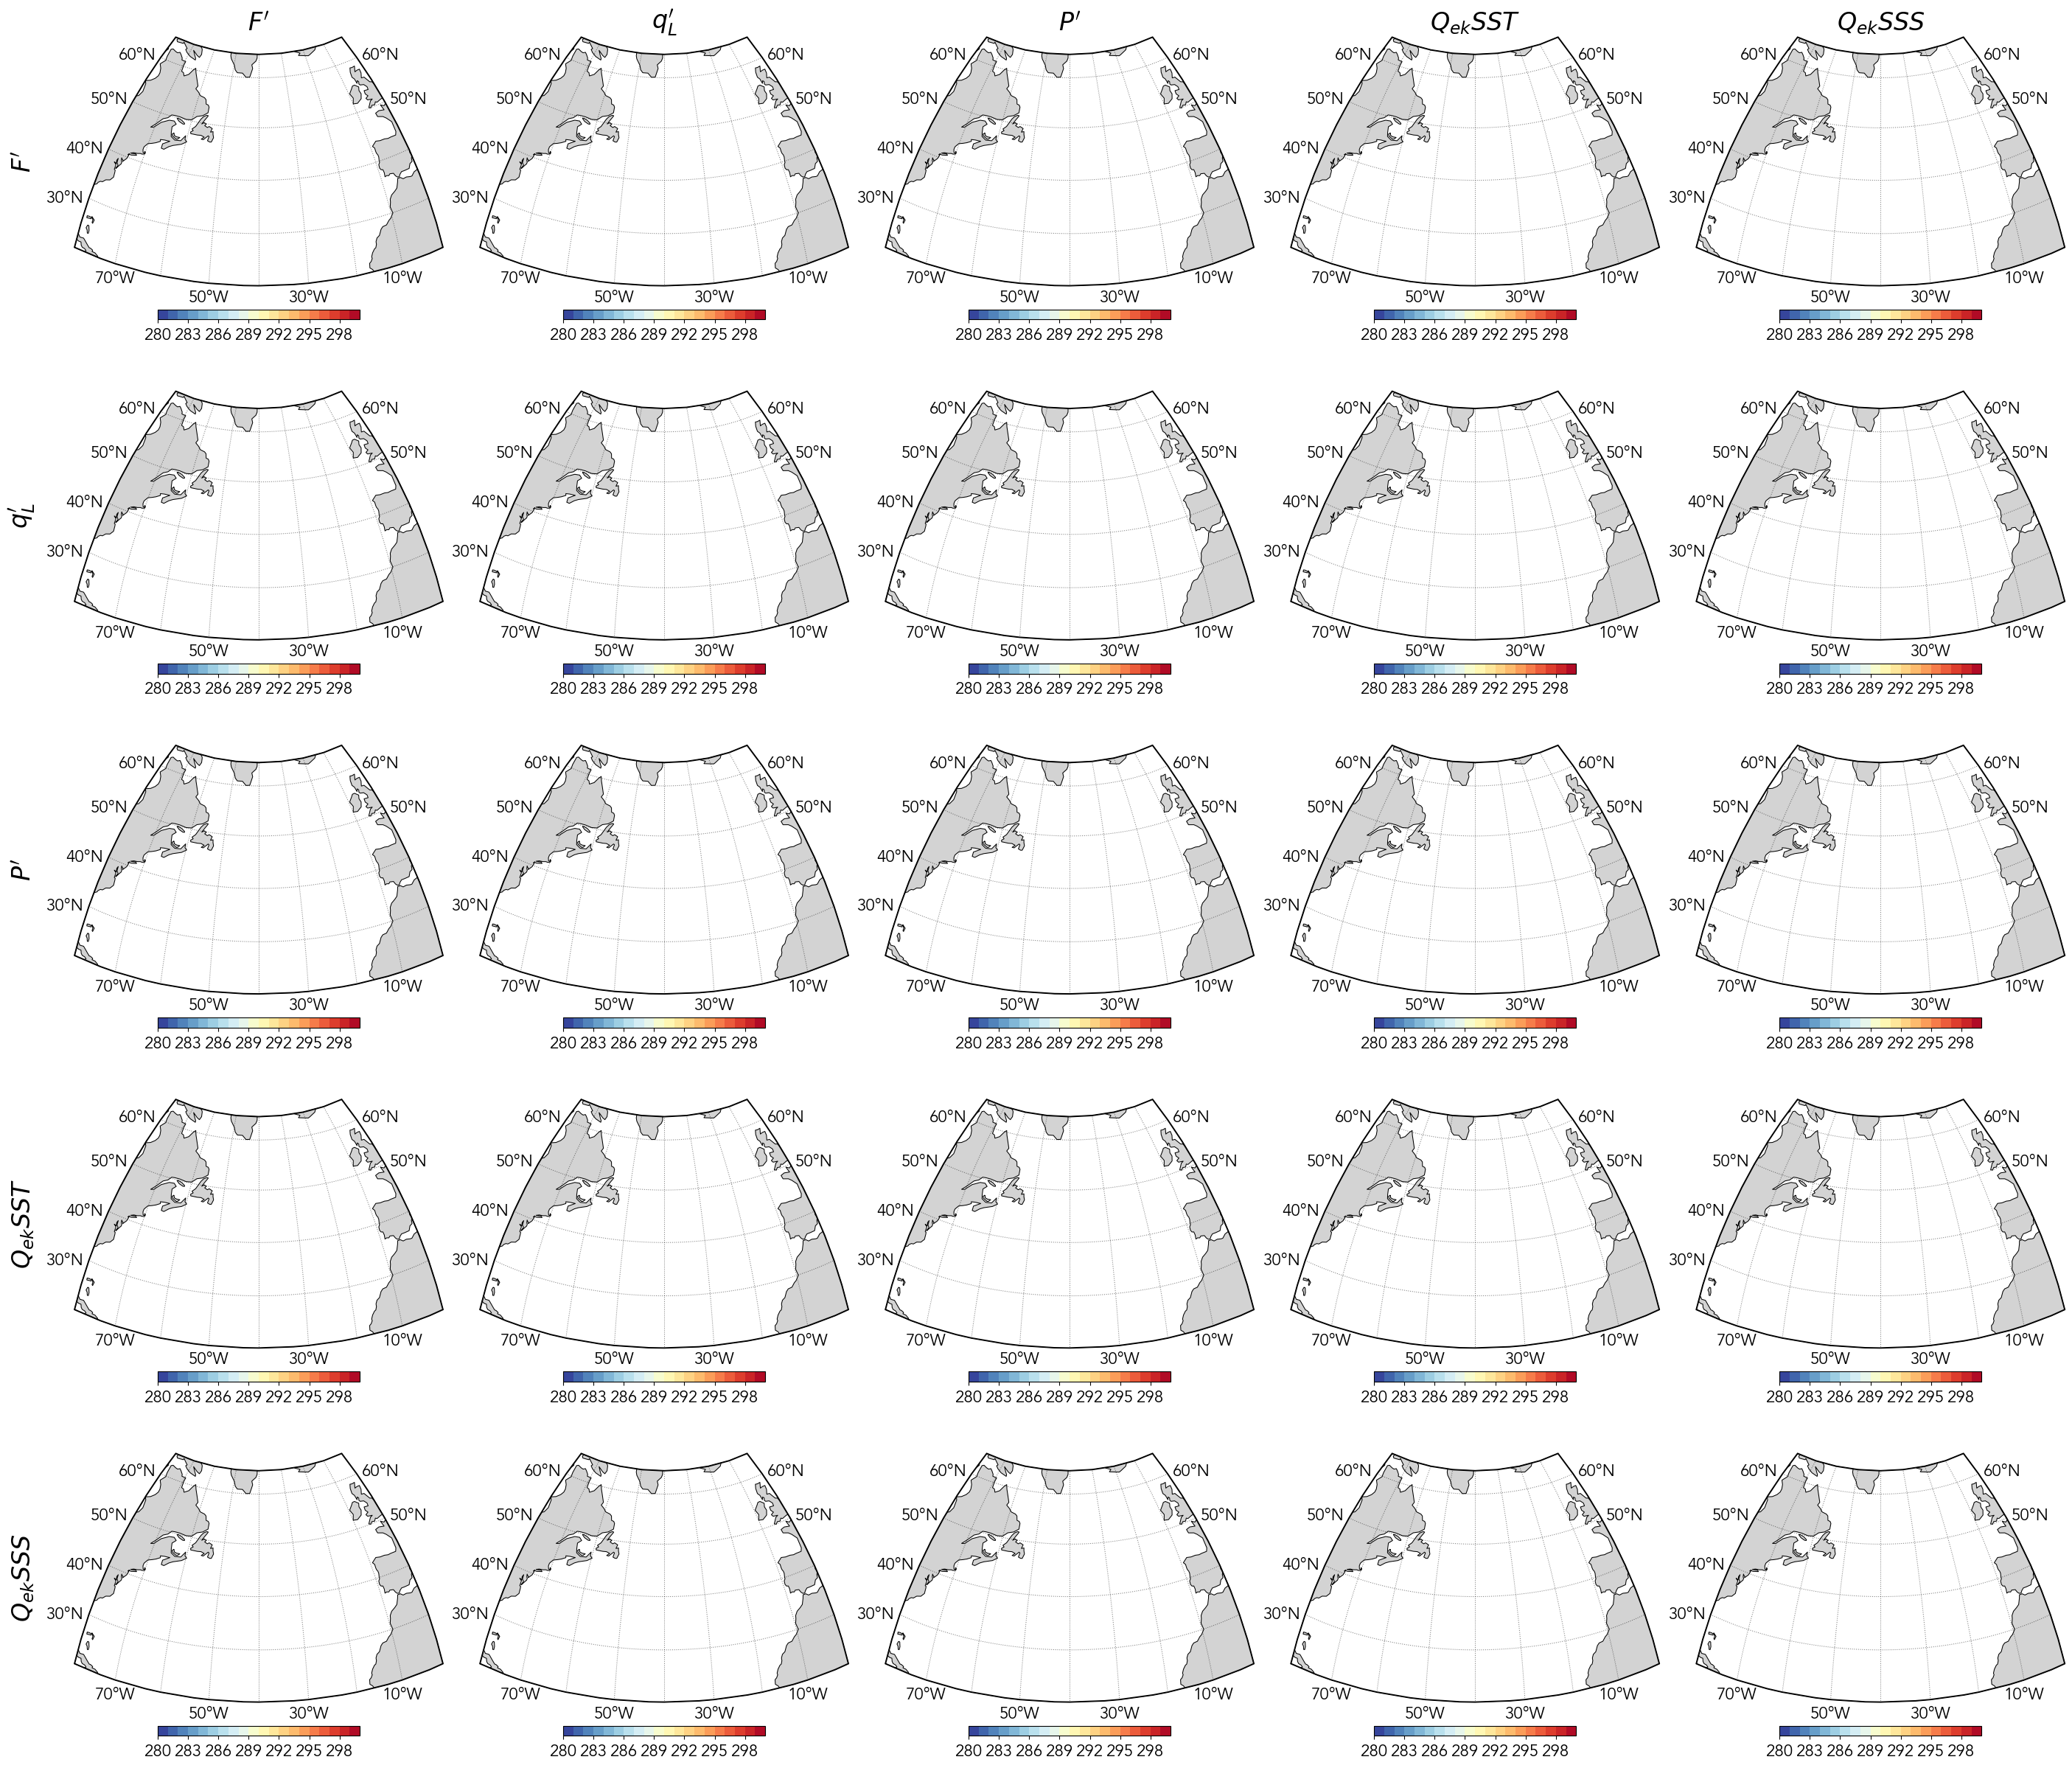

In [35]:
fig,axs,_   = viz.init_orthomap(5,5,bboxplot,figsize=(28,24))
ii          = 0

vnames_plot = ["$F'$","$q_L'$","$P'$","$Q_{ek} SST$","$Q_{ek} SSS$"]

for ax in axs.flatten():
    ax           = viz.add_coast_grid(ax,bboxplot,fill_color="lightgray",fontsize=fsz_tick,
                                fix_lon=np.arange(-80,10,10),fix_lat=np.arange(0,70,10),grid_color="k")
    
    
for vv in range(5):
    
    
    for uu in range(5):
        ax = axs[vv,uu]
        
        if vv == 0:
            ax.set_title(vnames_plot[uu],fontsize=fsz_axis)
        
        if uu == 0:
            viz.add_ylabel(vnames_plot[vv],fontsize=fsz_axis,ax=ax)
            
            
        cb = viz.hcbar(pcm,ax=ax,fraction=0.035,pad=0.01)
        cb.ax.tick_params(labelsize=fsz_tick)